In [1]:
import findspark 
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('noshow').getOrCreate()

!pip3 install --upgrade pip
!pip3 install sklearn

!pip3 install seaborn

import seaborn as sns
from sklearn import tree
import pandas as pd
import numpy as np

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: pip in ./.local/lib/python3.5/site-packages (20.1.1)
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
df= spark.read.csv('./noshow.csv',inferSchema=True,header=True)

In [3]:
df.printSchema

print((df.count(), len(df.columns)))

(110527, 14)


In [4]:
#data exploration
df.show()

df.columns

+-------------------+-------------+------+--------------------+--------------------+---+-----------------+-----------+------------+--------+----------+-------+------------+-------+
|          PatientId|AppointmentID|Gender|        ScheduledDay|      AppointmentDay|Age|    Neighbourhood|Scholarship|Hipertension|Diabetes|Alcoholism|Handcap|SMS_received|No-show|
+-------------------+-------------+------+--------------------+--------------------+---+-----------------+-----------+------------+--------+----------+-------+------------+-------+
| 2.9872499824296E13|      5642903|     F|2016-04-29 18:38:...|2016-04-29 00:00:...| 62|  JARDIM DA PENHA|          0|           1|       0|         0|      0|           0|     No|
|5.58997776694438E14|      5642503|     M|2016-04-29 16:08:...|2016-04-29 00:00:...| 56|  JARDIM DA PENHA|          0|           0|       0|         0|      0|           0|     No|
|  4.262962299951E12|      5642549|     F|2016-04-29 16:19:...|2016-04-29 00:00:...| 62|    MAT

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show']

In [5]:
df.describe().show()

+-------+--------------------+-----------------+------+------------------+-------------+-------------------+-------------------+-------------------+--------------------+--------------------+-------------------+-------+
|summary|           PatientId|    AppointmentID|Gender|               Age|Neighbourhood|        Scholarship|       Hipertension|           Diabetes|          Alcoholism|             Handcap|       SMS_received|No-show|
+-------+--------------------+-----------------+------+------------------+-------------+-------------------+-------------------+-------------------+--------------------+--------------------+-------------------+-------+
|  count|              110527|           110527|110527|            110527|       110527|             110527|             110527|             110527|              110527|              110527|             110527| 110527|
|   mean|1.474962657103923...|5675305.123426855|  null| 37.08887421173107|         null|0.09826558216544373| 0.1972459218109

In [6]:
df.printSchema()

root
 |-- PatientId: double (nullable = true)
 |-- AppointmentID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- ScheduledDay: timestamp (nullable = true)
 |-- AppointmentDay: timestamp (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Neighbourhood: string (nullable = true)
 |-- Scholarship: integer (nullable = true)
 |-- Hipertension: integer (nullable = true)
 |-- Diabetes: integer (nullable = true)
 |-- Alcoholism: integer (nullable = true)
 |-- Handcap: integer (nullable = true)
 |-- SMS_received: integer (nullable = true)
 |-- No-show: string (nullable = true)



In [7]:
df.na.drop().show()

+-------------------+-------------+------+--------------------+--------------------+---+-----------------+-----------+------------+--------+----------+-------+------------+-------+
|          PatientId|AppointmentID|Gender|        ScheduledDay|      AppointmentDay|Age|    Neighbourhood|Scholarship|Hipertension|Diabetes|Alcoholism|Handcap|SMS_received|No-show|
+-------------------+-------------+------+--------------------+--------------------+---+-----------------+-----------+------------+--------+----------+-------+------------+-------+
| 2.9872499824296E13|      5642903|     F|2016-04-29 18:38:...|2016-04-29 00:00:...| 62|  JARDIM DA PENHA|          0|           1|       0|         0|      0|           0|     No|
|5.58997776694438E14|      5642503|     M|2016-04-29 16:08:...|2016-04-29 00:00:...| 56|  JARDIM DA PENHA|          0|           0|       0|         0|      0|           0|     No|
|  4.262962299951E12|      5642549|     F|2016-04-29 16:19:...|2016-04-29 00:00:...| 62|    MAT

In [8]:
print((df.count(), len(df.columns)))

(110527, 14)


In [9]:
from pyspark.sql import functions as F
timeFmt = "yyyy-MM-dd'T'HH:mm:ss.SSS"
timeDiff = (F.unix_timestamp('AppointmentDay', format=timeFmt)
            - F.unix_timestamp('ScheduledDay', format=timeFmt))
df = df.withColumn("Duration", timeDiff)


In [10]:
df.show()

+-------------------+-------------+------+--------------------+--------------------+---+-----------------+-----------+------------+--------+----------+-------+------------+-------+--------+
|          PatientId|AppointmentID|Gender|        ScheduledDay|      AppointmentDay|Age|    Neighbourhood|Scholarship|Hipertension|Diabetes|Alcoholism|Handcap|SMS_received|No-show|Duration|
+-------------------+-------------+------+--------------------+--------------------+---+-----------------+-----------+------------+--------+----------+-------+------------+-------+--------+
| 2.9872499824296E13|      5642903|     F|2016-04-29 18:38:...|2016-04-29 00:00:...| 62|  JARDIM DA PENHA|          0|           1|       0|         0|      0|           0|     No|  -67088|
|5.58997776694438E14|      5642503|     M|2016-04-29 16:08:...|2016-04-29 00:00:...| 56|  JARDIM DA PENHA|          0|           0|       0|         0|      0|           0|     No|  -58107|
|  4.262962299951E12|      5642549|     F|2016-04-

In [11]:
# Rename columns 
df = df.withColumnRenamed('AppointmentID', 'AppointmentId')

df = df.withColumnRenamed('Handcap','Handicap')

df = df.withColumnRenamed('Hipertension','Hypertension')

In [12]:
df.show()


+-------------------+-------------+------+--------------------+--------------------+---+-----------------+-----------+------------+--------+----------+--------+------------+-------+--------+
|          PatientId|AppointmentId|Gender|        ScheduledDay|      AppointmentDay|Age|    Neighbourhood|Scholarship|Hypertension|Diabetes|Alcoholism|Handicap|SMS_received|No-show|Duration|
+-------------------+-------------+------+--------------------+--------------------+---+-----------------+-----------+------------+--------+----------+--------+------------+-------+--------+
| 2.9872499824296E13|      5642903|     F|2016-04-29 18:38:...|2016-04-29 00:00:...| 62|  JARDIM DA PENHA|          0|           1|       0|         0|       0|           0|     No|  -67088|
|5.58997776694438E14|      5642503|     M|2016-04-29 16:08:...|2016-04-29 00:00:...| 56|  JARDIM DA PENHA|          0|           0|       0|         0|       0|           0|     No|  -58107|
|  4.262962299951E12|      5642549|     F|201

In [13]:
df = df.drop('ScheduledDay','AppointmentDay','PatientId','AppointmentId','Neighbourhood')

In [14]:
df.show()

+------+---+-----------+------------+--------+----------+--------+------------+-------+--------+
|Gender|Age|Scholarship|Hypertension|Diabetes|Alcoholism|Handicap|SMS_received|No-show|Duration|
+------+---+-----------+------------+--------+----------+--------+------------+-------+--------+
|     F| 62|          0|           1|       0|         0|       0|           0|     No|  -67088|
|     M| 56|          0|           0|       0|         0|       0|           0|     No|  -58107|
|     F| 62|          0|           0|       0|         0|       0|           0|     No|  -58744|
|     F|  8|          0|           0|       0|         0|       0|           0|     No|  -62971|
|     F| 56|          0|           1|       1|         0|       0|           0|     No|  -58043|
|     F| 76|          0|           1|       0|         0|       0|           0|     No|  141789|
|     F| 23|          0|           0|       0|         0|       0|           0|    Yes|  118488|
|     F| 39|          0|      

In [15]:
df = df.filter( (df['Duration'] > 0) )

In [16]:
df.show()

+------+---+-----------+------------+--------+----------+--------+------------+-------+--------+
|Gender|Age|Scholarship|Hypertension|Diabetes|Alcoholism|Handicap|SMS_received|No-show|Duration|
+------+---+-----------+------------+--------+----------+--------+------------+-------+--------+
|     F| 76|          0|           1|       0|         0|       0|           0|     No|  141789|
|     F| 23|          0|           0|       0|         0|       0|           0|    Yes|  118488|
|     F| 39|          0|           0|       0|         0|       0|           0|    Yes|  116402|
|     F| 19|          0|           0|       0|         0|       0|           0|     No|  126695|
|     F| 30|          0|           0|       0|         0|       0|           0|     No|  118909|
|     M| 29|          0|           0|       0|         0|       0|           1|    Yes|  227748|
|     F| 22|          1|           0|       0|         0|       0|           0|     No|   44769|
|     M| 28|          0|      

In [17]:
df = df.filter( (df['Age'] > 0) &  (df['Age'] < 90))


In [18]:
df.show()

+------+---+-----------+------------+--------+----------+--------+------------+-------+--------+
|Gender|Age|Scholarship|Hypertension|Diabetes|Alcoholism|Handicap|SMS_received|No-show|Duration|
+------+---+-----------+------------+--------+----------+--------+------------+-------+--------+
|     F| 76|          0|           1|       0|         0|       0|           0|     No|  141789|
|     F| 23|          0|           0|       0|         0|       0|           0|    Yes|  118488|
|     F| 39|          0|           0|       0|         0|       0|           0|    Yes|  116402|
|     F| 19|          0|           0|       0|         0|       0|           0|     No|  126695|
|     F| 30|          0|           0|       0|         0|       0|           0|     No|  118909|
|     M| 29|          0|           0|       0|         0|       0|           1|    Yes|  227748|
|     F| 22|          1|           0|       0|         0|       0|           0|     No|   44769|
|     M| 28|          0|      

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

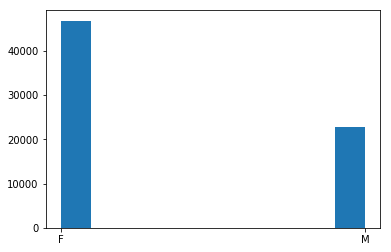

In [20]:
sexArr = np.array(df.select('Gender').collect())
plt.hist(sexArr)
plt.show()

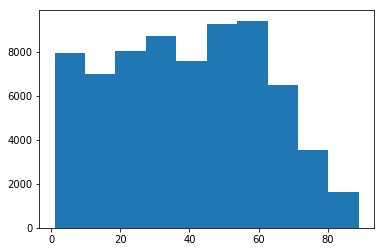

In [21]:
ageArr = np.array(df.select('Age').collect())
plt.hist(ageArr)
plt.show()

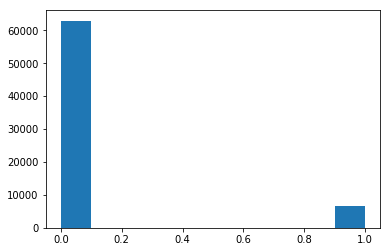

In [22]:
schArr = np.array(df.select('Scholarship').collect())
plt.hist(schArr)
plt.show()

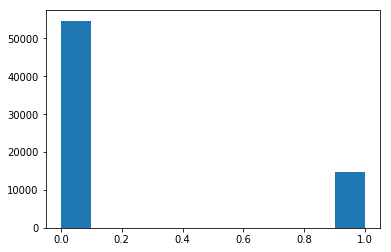

In [23]:
hypArr = np.array(df.select('Hypertension').collect())
plt.hist(hypArr)
plt.show()

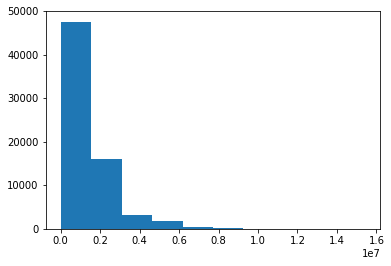

In [24]:
durArr = np.array(df.select('Duration').collect())
plt.hist(durArr)
plt.show()

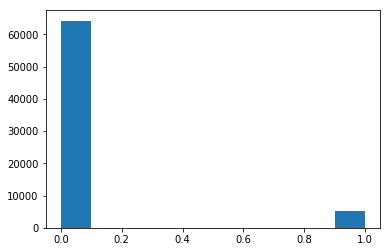

In [25]:
diaArr = np.array(df.select('Diabetes').collect())
plt.hist(diaArr)
plt.show()

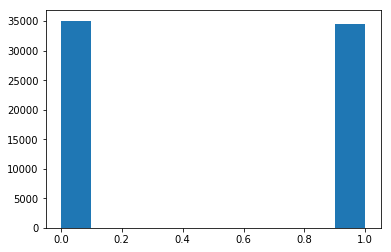

In [26]:
smsArr = np.array(df.select('SMS_received').collect())
plt.hist(smsArr)
plt.show()

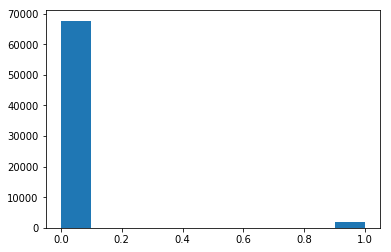

In [27]:
alcArr = np.array(df.select('Alcoholism').collect())
plt.hist(alcArr)
plt.show()

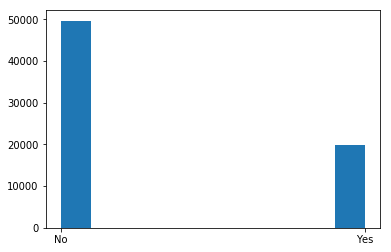

In [28]:
noshowArr = np.array(df.select('No-show').collect())
plt.hist(noshowArr)
plt.show()

In [29]:
df1 = df.toPandas()

In [30]:
df1['Gender'] = df1['Gender'].map({'M':1, 
                                 'F':0}
                               )
df1['No-show'] = df1['No-show'].map({'Yes':1, 
                                   'No':0}
                                 )

In [31]:
df1.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Duration
0,0,76,0,1,0,0,0,0,0,141789
1,0,23,0,0,0,0,0,0,1,118488
2,0,39,0,0,0,0,0,0,1,116402
3,0,19,0,0,0,0,0,0,0,126695
4,0,30,0,0,0,0,0,0,0,118909


In [32]:
# Feature selection
features = df1.drop(['No-show'], axis=1)
labels = df1['No-show']

# Fitting a tree
clf = tree.DecisionTreeClassifier()
clf.fit(features, labels)

# Feature Importances to see whether new feature created has any importance.
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print ("Feature ranking: ")
for i in range(0, 9, 1):
    print ("  {}.  feature: {} ({})".format(i, features.columns[i], importances[indices[i]]))

Feature ranking: 
  0.  feature: Gender (0.6860874623296077)
  1.  feature: Age (0.21047350739084617)
  2.  feature: Scholarship (0.0368071705219741)
  3.  feature: Hypertension (0.017842799808814355)
  4.  feature: Diabetes (0.014412031977022606)
  5.  feature: Alcoholism (0.0127888358598959)
  6.  feature: Handicap (0.009706311580949945)
  7.  feature: SMS_received (0.006964223517542563)
  8.  feature: Duration (0.004917657013346713)


In [33]:
from sklearn.feature_selection import chi2

from sklearn.feature_selection import SelectPercentile 

Text(0,0.5,'Score')

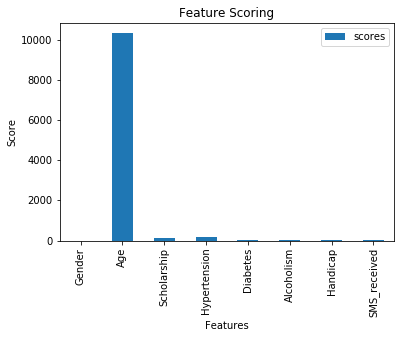

In [34]:
    ###Another way to select the feature###
    
    selector = SelectPercentile(chi2)
    selector.fit_transform(features, labels)
    scores = pd.Series(selector.scores_)
    columns = pd.Series(features.columns)
    selectbest = pd.concat([columns, scores], axis=1)
    selectbest.rename(columns={0:'features',
                   1:'scores'}, inplace=True)
    selectbest_plot = selectbest.iloc[:8,:].plot.bar()
    selectbest_plot.set_title('Feature Scoring')
    selectbest_plot.set_xticklabels(selectbest['features'])
    selectbest_plot.set_xlabel('Features')
    selectbest_plot.set_ylabel('Score')

In [35]:
!pip install imblearn

from imblearn.over_sampling import SMOTE
from collections import Counter

Defaulting to user installation because normal site-packages is not writeable


In [36]:
 #Boosting data

smt = SMOTE(random_state=111)
features_res, labels_res = smt.fit_sample(features, labels)

print('Resampled dataset size {}'.format(sorted(Counter(labels_res).items())))

Resampled dataset size [(0, 49691), (1, 49691)]


In [37]:
from pyspark.ml.classification import LogisticRegression

from pyspark.ml.feature import (VectorAssembler,VectorIndexer,
                                OneHotEncoder,StringIndexer)

In [38]:
df2 = spark.createDataFrame(pd.DataFrame(df1))

In [39]:
df2.show()

+------+---+-----------+------------+--------+----------+--------+------------+-------+--------+
|Gender|Age|Scholarship|Hypertension|Diabetes|Alcoholism|Handicap|SMS_received|No-show|Duration|
+------+---+-----------+------------+--------+----------+--------+------------+-------+--------+
|     0| 76|          0|           1|       0|         0|       0|           0|      0|  141789|
|     0| 23|          0|           0|       0|         0|       0|           0|      1|  118488|
|     0| 39|          0|           0|       0|         0|       0|           0|      1|  116402|
|     0| 19|          0|           0|       0|         0|       0|           0|      0|  126695|
|     0| 30|          0|           0|       0|         0|       0|           0|      0|  118909|
|     1| 29|          0|           0|       0|         0|       0|           1|      1|  227748|
|     0| 22|          1|           0|       0|         0|       0|           0|      0|   44769|
|     1| 28|          0|      

In [40]:
lr = LogisticRegression()

In [41]:
df2.printSchema()

root
 |-- Gender: long (nullable = true)
 |-- Age: long (nullable = true)
 |-- Scholarship: long (nullable = true)
 |-- Hypertension: long (nullable = true)
 |-- Diabetes: long (nullable = true)
 |-- Alcoholism: long (nullable = true)
 |-- Handicap: long (nullable = true)
 |-- SMS_received: long (nullable = true)
 |-- No-show: long (nullable = true)
 |-- Duration: long (nullable = true)



In [42]:
assembler = VectorAssembler(inputCols=['Gender',
 'Age',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'SMS_received',
 'Duration'],outputCol='features')

In [43]:
from pyspark.ml import Pipeline

In [44]:
log_reg_noshow = LogisticRegression(featuresCol='features',labelCol='No-show')

In [45]:
pipeline = Pipeline(stages=[assembler,log_reg_noshow])

In [46]:
train_noshow_data, test_noshow_data = df2.randomSplit([0.7,.3])

In [47]:
fit_model = pipeline.fit(train_noshow_data)

In [48]:
results = fit_model.transform(test_noshow_data)

In [49]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

my_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                       labelCol='No-show')

In [50]:
results.select('No-show','prediction').show()

+-------+----------+
|No-show|prediction|
+-------+----------+
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
+-------+----------+
only showing top 20 rows



In [51]:
AUC = my_eval.evaluate(results)

AUC

0.5001623894380963

In [52]:
#Tree Methods

from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

from pyspark.ml.classification import DecisionTreeClassifier,GBTClassifier,RandomForestClassifier

In [53]:
dtc = DecisionTreeClassifier(labelCol='No-show',featuresCol='features')
rfc = RandomForestClassifier(labelCol='No-show',featuresCol='features')
gbt = GBTClassifier(labelCol='No-show',featuresCol='features')

In [54]:
dtc = Pipeline(stages=[assembler,dtc])

rfc = Pipeline(stages=[assembler,rfc])

gbt = Pipeline(stages=[assembler,gbt])

In [55]:
dtc_model = dtc.fit(train_noshow_data)

rfc_model = rfc.fit(train_noshow_data)

gbt_model = gbt.fit(train_noshow_data)

In [56]:
dtc_predictions = dtc_model.transform(test_noshow_data)
rfc_predictions = rfc_model.transform(test_noshow_data)
gbt_predictions = gbt_model.transform(test_noshow_data)

In [57]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [58]:
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'No-show')

In [59]:
print("DTC")
print(my_binary_eval.evaluate(dtc_predictions))

print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))

my_binary_gbt_eval = BinaryClassificationEvaluator(labelCol='No-show', rawPredictionCol='prediction')
print("GBT")
print(my_binary_gbt_eval.evaluate(gbt_predictions))

DTC
0.5316818646379727
RFC
0.6040326880894527
GBT
0.50376919725056


In [60]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [61]:
acc_evaluator = MulticlassClassificationEvaluator(labelCol="No-show", predictionCol="prediction", metricName="accuracy")

In [62]:
dtc_acc = acc_evaluator.evaluate(dtc_predictions)
rfc_acc = acc_evaluator.evaluate(rfc_predictions)
gbt_acc = acc_evaluator.evaluate(gbt_predictions)

In [63]:
print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
print('-'*40)
print('An ensemble using GBT has an accuracy of: {0:2.2f}%'.format(gbt_acc*100))

Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 71.70%
----------------------------------------
A random forest ensemble has an accuracy of: 71.75%
----------------------------------------
An ensemble using GBT has an accuracy of: 71.69%
